In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [6]:
measurements_df = pd.read_csv('data/measurements.csv')

display(measurements_df)


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


# Data cleaning & EDA

In [3]:
measurements_df.dtypes





distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [4]:

# Check for missing values in the dataset
missing_values = measurements_df.isnull().sum()

# Display the missing values count for each column
missing_values

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [5]:
# replace missing values in 'temp_inside' with the median temperature
measurements_df['temp_inside'].fillna(measurements_df['temp_inside'].median(), inplace=True)

# For 'specials', replace NaN values with 'None' indicating normal conditions
measurements_df['specials'].fillna('None', inplace=True)


TypeError: could not convert string to float: '21,5'

In [ ]:
# Define numeric columns
numeric_cols = ['consume', 'distance', 'temp_inside', 'temp_outside', 'speed']

# Loop through each numeric column and apply the transformation a lot of problems in this dataset comes from a "," which breaks the analysis, we need to replace that, by first transforming into strings, replace the character, then retransform into float
for col in numeric_cols:
    # Convert the column to string
    measurements_df[col] = measurements_df[col].astype(str)
    
    # Replace commas with dots
    measurements_df[col] = measurements_df[col].str.replace(',', '.')
    
    # Convert the column to float
    measurements_df[col] = measurements_df[col].astype(float)

# Convert 'temp_inside' column to string, replace commas with dots, and convert to float
measurements_df['temp_inside'] = measurements_df['temp_inside'].astype(str)
measurements_df['temp_inside'] = measurements_df['temp_inside'].str.replace(',', '.')
measurements_df['temp_inside'] = measurements_df['temp_inside'].astype(float)

# Now the numeric columns have commas replaced with dots and are of type float
print(measurements_df.dtypes)

distance         float64
consume          float64
speed            float64
temp_inside      float64
temp_outside     float64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters     object
refill gas        object
dtype: object


In [ ]:
# Generate descriptive statistics for numerical variables
descriptive_stats_numerical = measurements_df.describe()

# Generate descriptive statistics for categorical variables
descriptive_stats_categorical = measurements_df.describe(include=['O'])

descriptive_stats_numerical, descriptive_stats_categorical


(         distance     consume       speed  temp_inside  temp_outside  \
 count  388.000000  388.000000  388.000000   376.000000    388.000000   
 mean    19.652835    4.912371   41.927835    21.929521     11.358247   
 std     22.667837    1.033172   13.598524     1.010455      6.991542   
 min      1.300000    3.300000   14.000000    19.000000     -5.000000   
 25%     11.800000    4.300000   32.750000    21.500000      7.000000   
 50%     14.600000    4.700000   40.500000    22.000000     10.000000   
 75%     19.000000    5.300000   50.000000    22.500000     16.000000   
 max    216.100000   12.200000   90.000000    25.500000     31.000000   
 
                AC        rain         sun  
 count  388.000000  388.000000  388.000000  
 mean     0.077320    0.123711    0.082474  
 std      0.267443    0.329677    0.275441  
 min      0.000000    0.000000    0.000000  
 25%      0.000000    0.000000    0.000000  
 50%      0.000000    0.000000    0.000000  
 75%      0.000000    0.00

 Distance:
    Varie significantly with a mean of approximately 19.65 km.
    Has a wide range from a minimuum of 1.3 km to a maximum of 216.1 km, indicating a diverse set of trip lengths.

Consume:
    The average fuel consumption is around 4.91 liters per 100 km.
    Shows a relatively small standard deviation, suggesting that most trips have similar fuel efficiency.

Speed:
    Shows a broad range of average speeds, ranging from 14 to 90 km/h.
    Reflects varied driving conditions encountered during the trips.

Temperature Inside:
    Averages around 21.9°C, indicating consistent interior conditions during the trips.

Temperature Outside:
    Shows a broad range of temperatures, from -5 to 31°C.
    Highlights different weaather conditions experienced durin trips.

AC, Rain, Sun:
    These binary variables indicate the presence of certain conditions during trips:
            AC: Air conditioning use.
            Rain: Rainy condition.
            Sun: Sunny conditions.
    Most values are 0, indicating the absence of these conditions in the majority of trips.

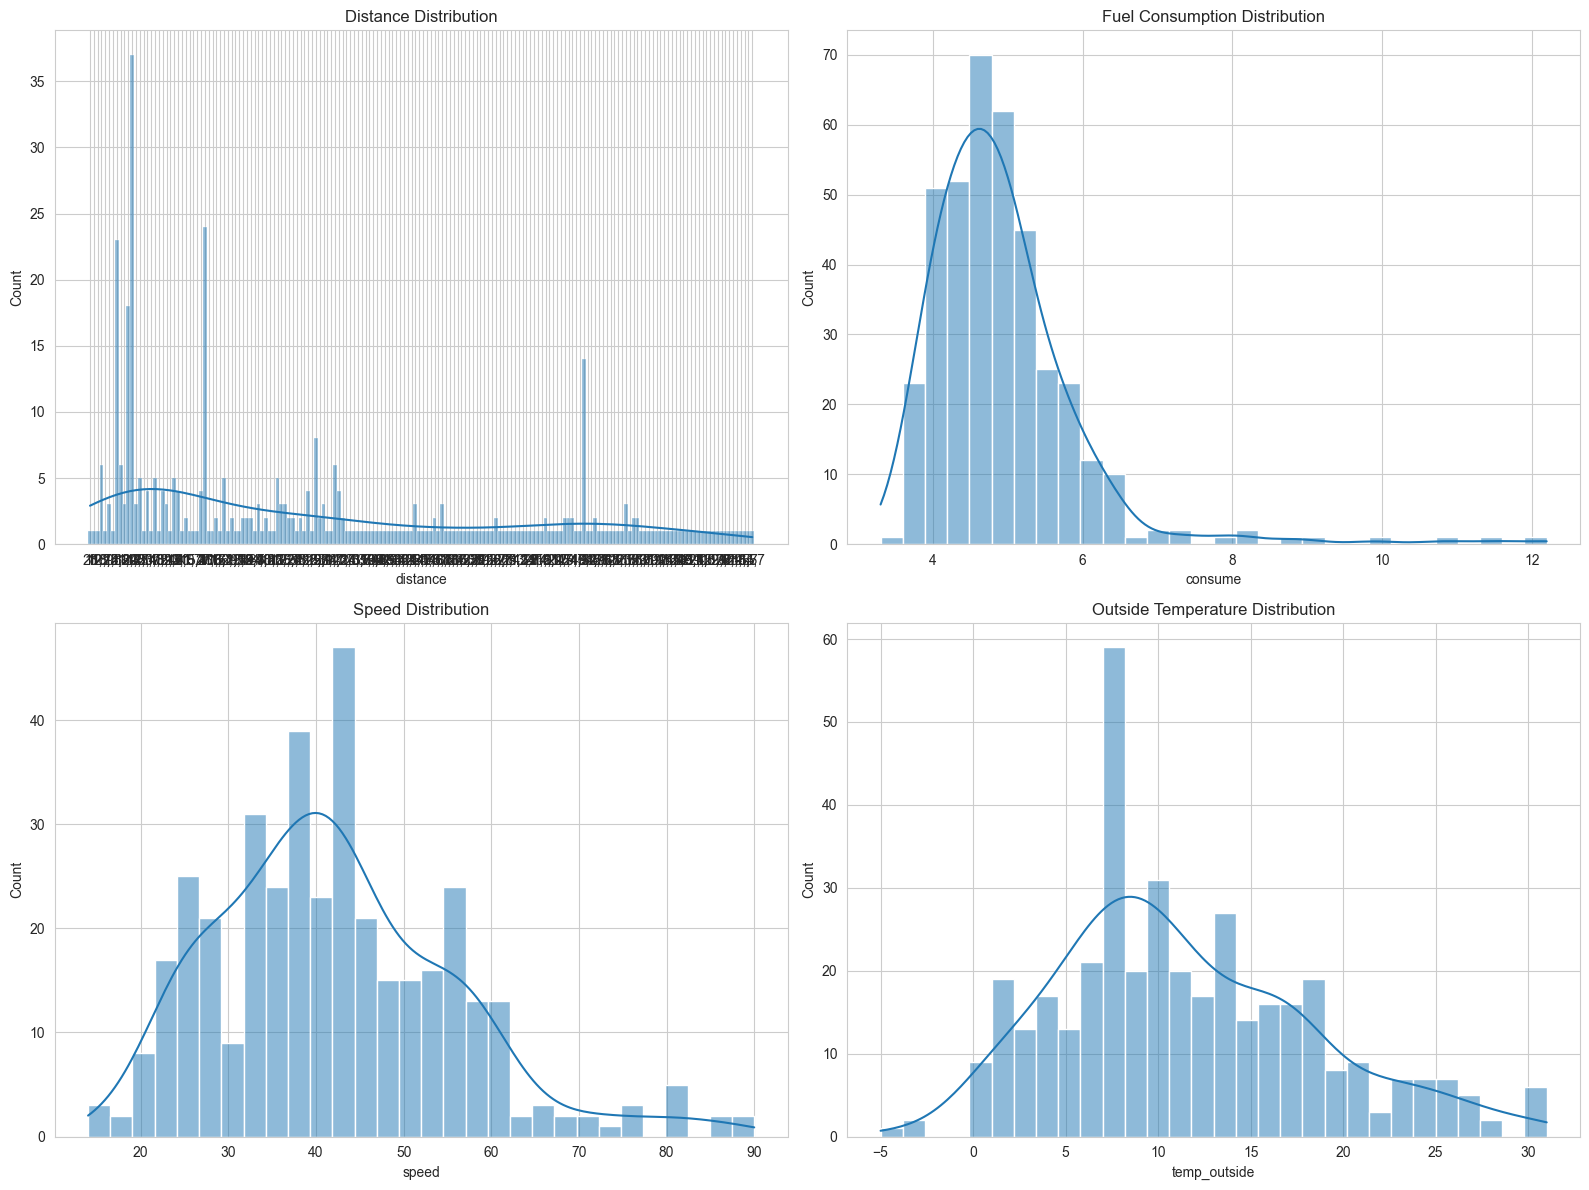

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of Key Variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot distributions
sns.histplot(measurements_df['distance'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distance Distribution')

sns.histplot(measurements_df['consume'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Fuel Consumption Distribution')

sns.histplot(measurements_df['speed'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Speed Distribution')

sns.histplot(measurements_df['temp_outside'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Outside Temperature Distribution')

plt.tight_layout()
plt.show()


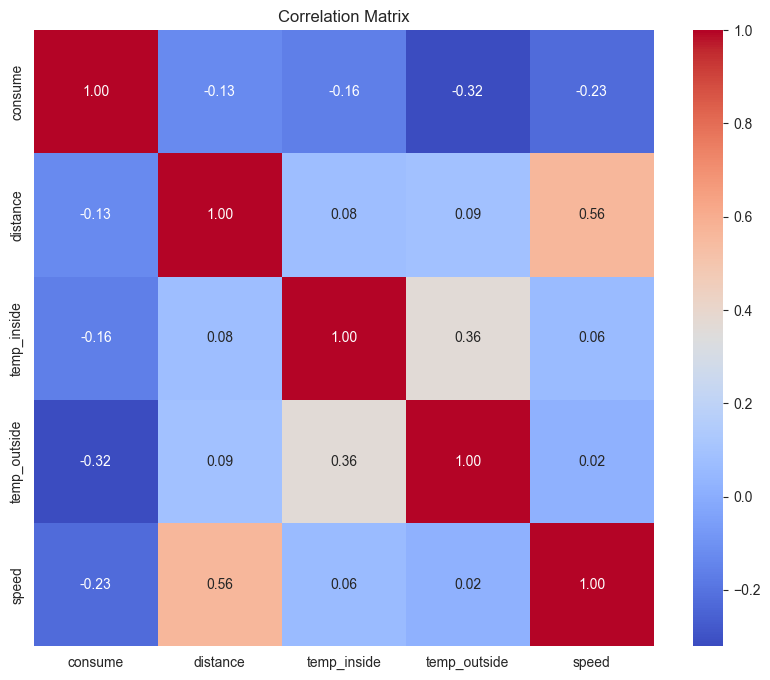

In [ ]:
# Define numeric columns
numeric_cols = ['consume', 'distance', 'temp_inside', 'temp_outside', 'speed']

# Convert numeric columns to float
measurements_df[numeric_cols] = measurements_df[numeric_cols].replace(',', '.', regex=True).astype(float)

# Compute correlation matrix
corr_matrix = measurements_df[numeric_cols].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Conclussion : 

Distance and speed have a moderate positive correlation, which makes intuitive sense — longer trips often involve higher speeds.

AC and temp_inside seem to have a moderate positive correlation, indicating that the use of air conditioning might be associated with a higher interior temperature, or vice versa.

Rain appears to have a moderate positive correlation with consume, suggesting that trips taken in the rain may have higher fuel consumption.

To go further, regression models could be used to predict car's consuption, additional data like date of use could also be great in predicting seasonality of a certain type of vehicule, in certain conditions, and deliver figures on overall data